In [238]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [239]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sfma.api import SFMAModel

## Make Simulations

In [240]:
np.random.seed(1)

In [241]:
n = 100

In [242]:
intercept = 1.5
slope = 5

x_domain = [0, 10]

ineff = 0.4

sample_size_1 = [1000, 0.7]
sample_size_2 = [1000, 0.3]

In [243]:
def frontier(x):
    return np.log(intercept + slope * x)

In [273]:
def simulate():
    x = np.random.uniform(low=x_domain[0], high=x_domain[1], size=n)
    sample_sizes_1 = np.random.negative_binomial(
        n=sample_size_1[0], p=sample_size_1[1], size=int(n / 2)
    )
    sample_sizes_2 = np.random.negative_binomial(
        n=sample_size_2[0], p=sample_size_2[1], size=int(n / 2)
    )
    sample_sizes = np.append(sample_sizes_1, sample_sizes_2)
    
    the_frontier = frontier(x)
    inefficiency = np.random.exponential(ineff, size=n)
    means = the_frontier - inefficiency
    samples = [np.random.normal(m, scale=4, size=s) for m, s in zip(means, sample_sizes)]
    est_means = np.array([np.mean(s) for s in samples])
    est_sterr = np.array([np.sqrt(np.sum(sum((s - np.mean(s))**2)) / ((len(s) - 1)))/np.sqrt(len(s)) for s in samples])
    df = pd.DataFrame({
        'output': est_means,
        'se': est_sterr / 50,
        'input': x,
        'ones': np.ones(len(x)),
        'frontier': the_frontier,
        'truth': means,
        'sample_size': sample_sizes
    })
    return df

In [274]:
sim = simulate()

In [275]:
the_frontier = sim['frontier']
linspace = np.linspace(x_domain[0], x_domain[1])
front = frontier(linspace)

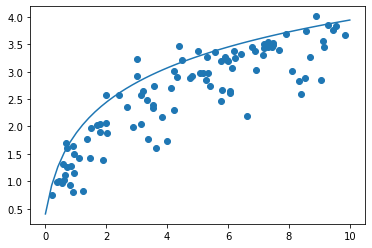

In [276]:
plt.plot(linspace, front, linestyle='solid')
plt.scatter(sim.input, sim.output)

<ErrorbarContainer object of 3 artists>

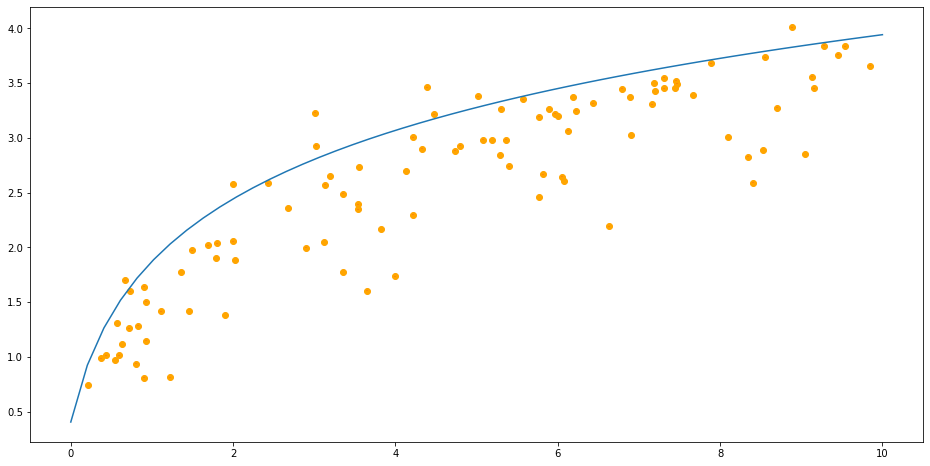

In [277]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.plot(linspace, front, linestyle='solid')
ax.scatter(sim.input, sim.output, color='orange')
ax.errorbar(sim.input, sim.output, yerr=sim.se, linestyle='None')

In [294]:
model = SFMAModel(
    df=sim,
    col_output='output',
    col_se='se',
    col_input='input'
)
no_se_model = SFMAModel(
    df=sim,
    col_output='output',
    col_se='ones',
    col_input='input'
)
lin_tails = SFMAModel(
    df=sim,
    col_output='output',
    col_se='se',
    col_input='input',
    r_linear=True
)
concave = SFMAModel(
    df=sim,
    col_output='output',
    col_se='se',
    col_input='input',
    r_linear=True,
    concave=True
)

In [296]:
model.fit()
no_se_model.fit()
lin_tails.fit()
concave.fit()

TypeError: 'NoneType' object is not iterable

In [289]:
sim['base_predictions'] = model.predict()
sim['no_se_predictions'] = no_se_model.predict()
sim['linear_tail_predictions'] = lin_tails.predict()
sim['concave_predictions'] = concave.predict()
sim.sort_values('input', inplace=True)

In [291]:
model.solver.solvers[0].x_opt

array([ 2.55889592e-07,  1.84533892e-07,  1.60000790e-08, -5.93087753e-08,
        1.25503103e-08,  2.02566425e-07,  0.00000000e+00])

In [282]:
lin_tails.inefficiencies

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

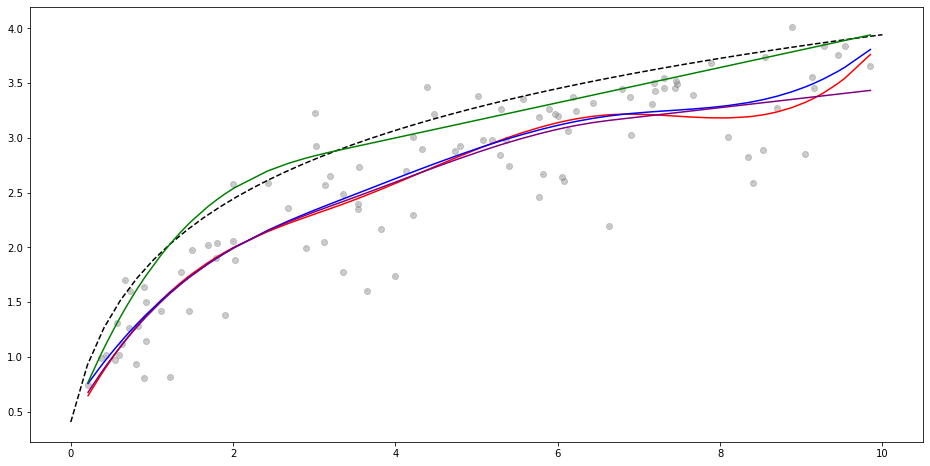

In [283]:
fig, axes = plt.subplots(1, 1, figsize=(16, 8))
axes.plot(linspace, front, linestyle='dashed', color='black')
axes.scatter(sim.input, sim.output, color='grey', alpha=0.4)
axes.errorbar(sim.input, sim.output, yerr=sim.se, linestyle='None', color='grey', alpha=0.4)
axes.plot(sim.input, sim.base_predictions, color='red')
axes.plot(sim.input, sim.no_se_predictions, color='blue')
axes.plot(sim.input, sim.linear_tail_predictions, color='purple')
axes.plot(sim.input, sim.concave_predictions, color='green')

In [212]:
lin_tails.solver.solvers[0].x_opt

array([0.50368614, 2.04714992, 2.02101862, 3.30940325, 3.35231906,
       0.        ])

In [213]:
lin_tails.inefficiencies

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [221]:
lin_tails.solver.solvers[1].model.gammas_padded

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Simulations

In [58]:
num_simulations = 10

In [33]:
sim_dfs = []
for i in range(num_simulations):
    sim_i = simulate()
    model = SFMAModel(
        df=sim_i,
        col_output='output',
        col_se='se',
        col_input='input',
    )
    no_se_model = SFMAModel(
        df=sim_i,
        col_output='output',
        col_se='ones',
        col_input='input'
    )
    lin_tails = SFMAModel(
        df=sim_i,
        col_output='output',
        col_se='se',
        col_input='input',
        r_linear=True
    )
    model.fit()
    no_se_model.fit()
    lin_tails.fit()
    sim_i['base_predictions'] = model.predict()
    sim_i['no_se_predictions'] = no_se_model.predict()
    sim_i['linear_tail_predictions'] = lin_tails.predict()
    sim_i.sort_values('input', inplace=True)
    sim_dfs.append(sim_i)

/Users/marlena/repos/SFMA/src/sfma/models/marginal.py:31: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(eta) * r / np.sqrt(2 * V * (gamma + data.sigma2))


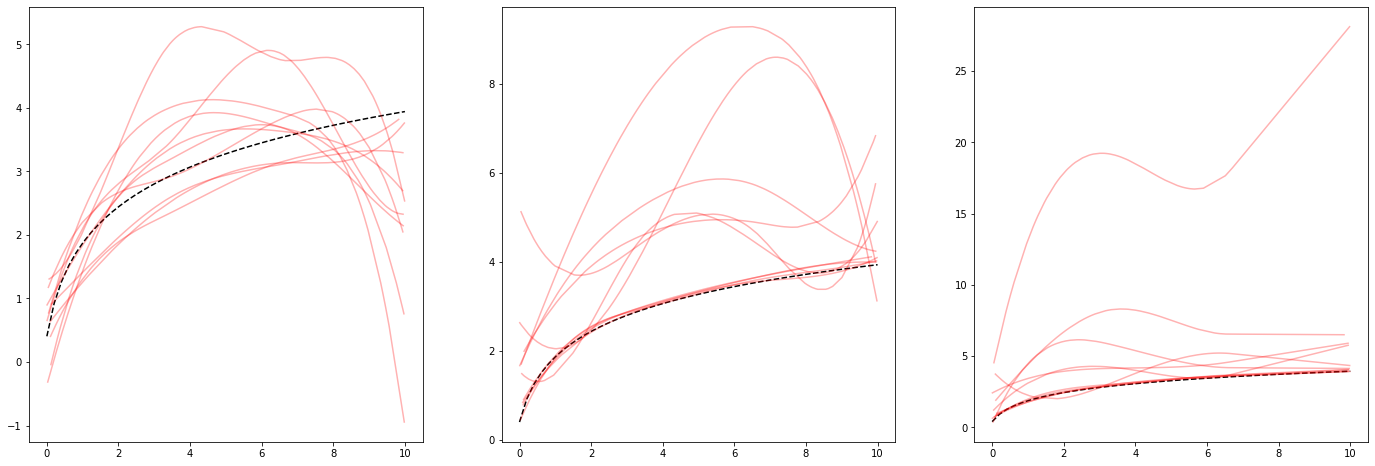

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
for i, kind in enumerate(['no_se_predictions',
                         'base_predictions',
                         'linear_tail_predictions']):
    axes[i].plot(linspace, front, linestyle='dashed', color='black')
    for df in sim_dfs:
        axes[i].plot(df.input, df[kind], color='red', alpha=0.3)